In [ ]:
#Name: Gughapriyaa Elango
#Date: 9th March 2023

#“I certify that this assignment represents my work. I have not used any unauthorized or unacknowledged assistance 
#or sources in completing it, including free or commercial systems or services offered on the internet.”


In [1]:
#All libraries imported
import pandas as pd
import numpy as np
import datetime as dt
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn import decomposition
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import roc_curve,roc_auc_score, precision_score, recall_score,f1_score
from sklearn.metrics import make_scorer, accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
from mpl_toolkits.mplot3d import Axes3D
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
import plotly.express as px
from sklearn.manifold import TSNE

In [2]:
#importing training data and preview

data=pd.read_csv("digit-train.csv")
data.head(50)

label  pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  \
0       3       0       0       0       0       0       0       0       0   
1       5       0       0       0       0       0       0       0       0   
2       3       0       0       0       0       0       0       0       0   
3       2       0       0       0       0       0       0       0       0   
4       0       0       0       0       0       0       0       0       0   
5       6       0       0       0       0       0       0       0       0   
6       6       0       0       0       0       0       0       0       0   
7       7       0       0       0       0       0       0       0       0   
8       2       0       0       0       0       0       0       0       0   
9       2       0       0       0       0       0       0       0       0   
10      0       0       0       0       0       0       0       0       0   
11      8       0       0       0       0       0       0       0       0   
12      5       0       0       0       0       0       0       0       0   
13      0       0       0       0       0       0       0       0       0   
14      4       0       0       0       0       0       0       0       0   
15      7       0       0       0       0       0       0       0       0   
16      6       0       0       0       0       0       0       0       0   
17      5       0       0       0       0       0       0       0       0   
18      4       0       0       0       0       0       0       0       0   
19      4       0       0       0       0       0       0       0       0   
20      9       0       0       0       0       0       0       0       0   
21      9       0       0       0       0       0       0       0       0   
22      5       0       0       0       0       0       0       0       0   
23      0       0       0       0       0       0       0       0       0   
24      6       0       0       0       0       0       0       0       0   
25      0       0       0       0       0       0       0       0       0   
26      3       0       0       0       0       0       0       0       0   
27      9       0       0       0       0       0       0       0       0   
28      7       0       0       0       0       0       0       0       0   
29      3       0       0       0       0       0       0       0       0   
30      1       0       0       0       0       0       0       0       0   
31      5       0       0       0       0       0       0       0       0   
32      2       0       0       0       0       0       0       0       0   
33      0       0       0       0       0       0       0       0       0   
34      7       0       0       0       0       0       0       0       0   
35      4       0       0       0       0       0       0       0       0   
36      7       0       0       0       0       0       0       0       0   
37      2       0       0       0       0       0       0       0       0   
38      6       0       0       0       0       0       0       0       0   
39      5       0       0       0       0       0       0       0       0   
40      7       0       0       0       0       0       0       0       0   
41      8       0       0       0       0       0       0       0       0   
42      5       0       0       0       0       0       0       0       0   
43      7       0       0       0       0       0       0       0       0   
44      4       0       0       0       0       0       0       0       0   
45      8       0       0       0       0       0       0       0       0   
46      8       0       0       0       0       0       0       0       0   
47      5       0       0       0       0       0       0       0       0   
48      7       0       0       0       0       0       0       0       0   
49      9       0       0       0       0       0       0       0       0   

    pixel8  ...  pixel774  pixel775  pixel776  pixel777  pixel778  pixel779 

In [3]:
#importing testing data and preview

test_data=pd.read_csv("digit-test.csv")
test_data.head()

label  pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  \
0      0       0       0       0       0       0       0       0       0   
1      0       0       0       0       0       0       0       0       0   
2      7       0       0       0       0       0       0       0       0   
3      3       0       0       0       0       0       0       0       0   
4      5       0       0       0       0       0       0       0       0   

   pixel8  ...  pixel774  pixel775  pixel776  pixel777  pixel778  pixel779  \
0       0  ...         0         0         0         0         0         0   
1       0  ...         0         0         0         0         0         0   
2       0  ...         0         0         0         0         0         0   
3       0  ...         0         0         0         0         0         0   
4       0  ...         0         0         0         0         0         0   

   pixel780  pixel781  pixel782  pixel783  
0         0         0         0         0  
1         0         0         0         0  
2         0         0         0         0  
3         0         0         0         0  
4         0         0         0         0  

[5 rows x 785 columns]

In [4]:
#shape of data
data.shape

(4198, 785)

In [5]:
#shape of test data
test_data.shape

(4198, 785)

In [6]:
#checking for missing values in the data
data.isna().any().any()

False

In [7]:
#how many data is present in each digit?
data['label'].value_counts()

1    471
8    438
7    436
3    425
4    420
0    418
6    416
2    413
5    390
9    371
Name: label, dtype: int64

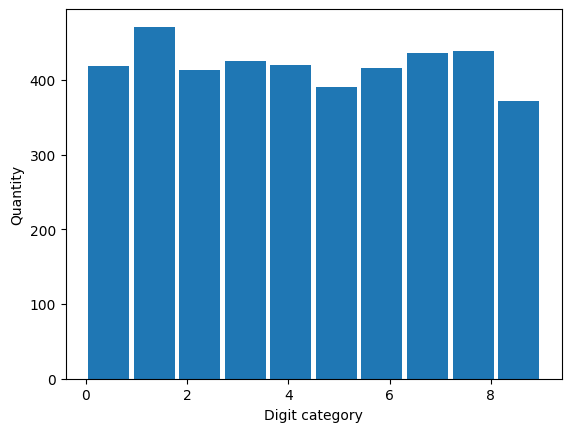

In [8]:
#visualizing the amount of data present in each digit
plt.hist(data['label'],rwidth=0.9)
plt.ylabel("Quantity")
plt.xlabel("Digit category")
plt.show()

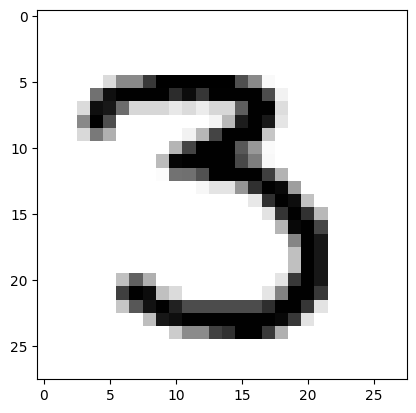

In [9]:
#Lets visualise the first row which is 3 as an image using imshow
img=data.loc[29,'pixel0':]
img=np.array(img)
img=np.reshape(img,(28,28))
plt.imshow(img,cmap=plt.cm.binary)

In [10]:
#Split the training data into X and y
X=data.loc[:,'pixel0':]
y=data.loc[:,'label']


In [11]:
#Split the test data into X and y
df_test=test_data.loc[:,'pixel0':]
df_label=test_data.loc[:,'label']


In [12]:
#decision tree classifier without dimensionality reduction like pca or tsne

tree_clf = DecisionTreeClassifier(max_depth=6, random_state=42)
tree_clf.fit(X, y)

from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier, plot_tree, DecisionTreeRegressor
print("Accuracy:",metrics.accuracy_score(y, tree_clf.predict(X)))



Accuracy: 0.7732253454025727


In [13]:
from graphviz import Source
from sklearn.tree import export_graphviz

export_graphviz(
        tree_clf,
        out_file="iris_tree.dot",
        #feature_names=data.columns[1:],
        #class_names=data.columns[0],
        rounded=True,
        filled=True
    )

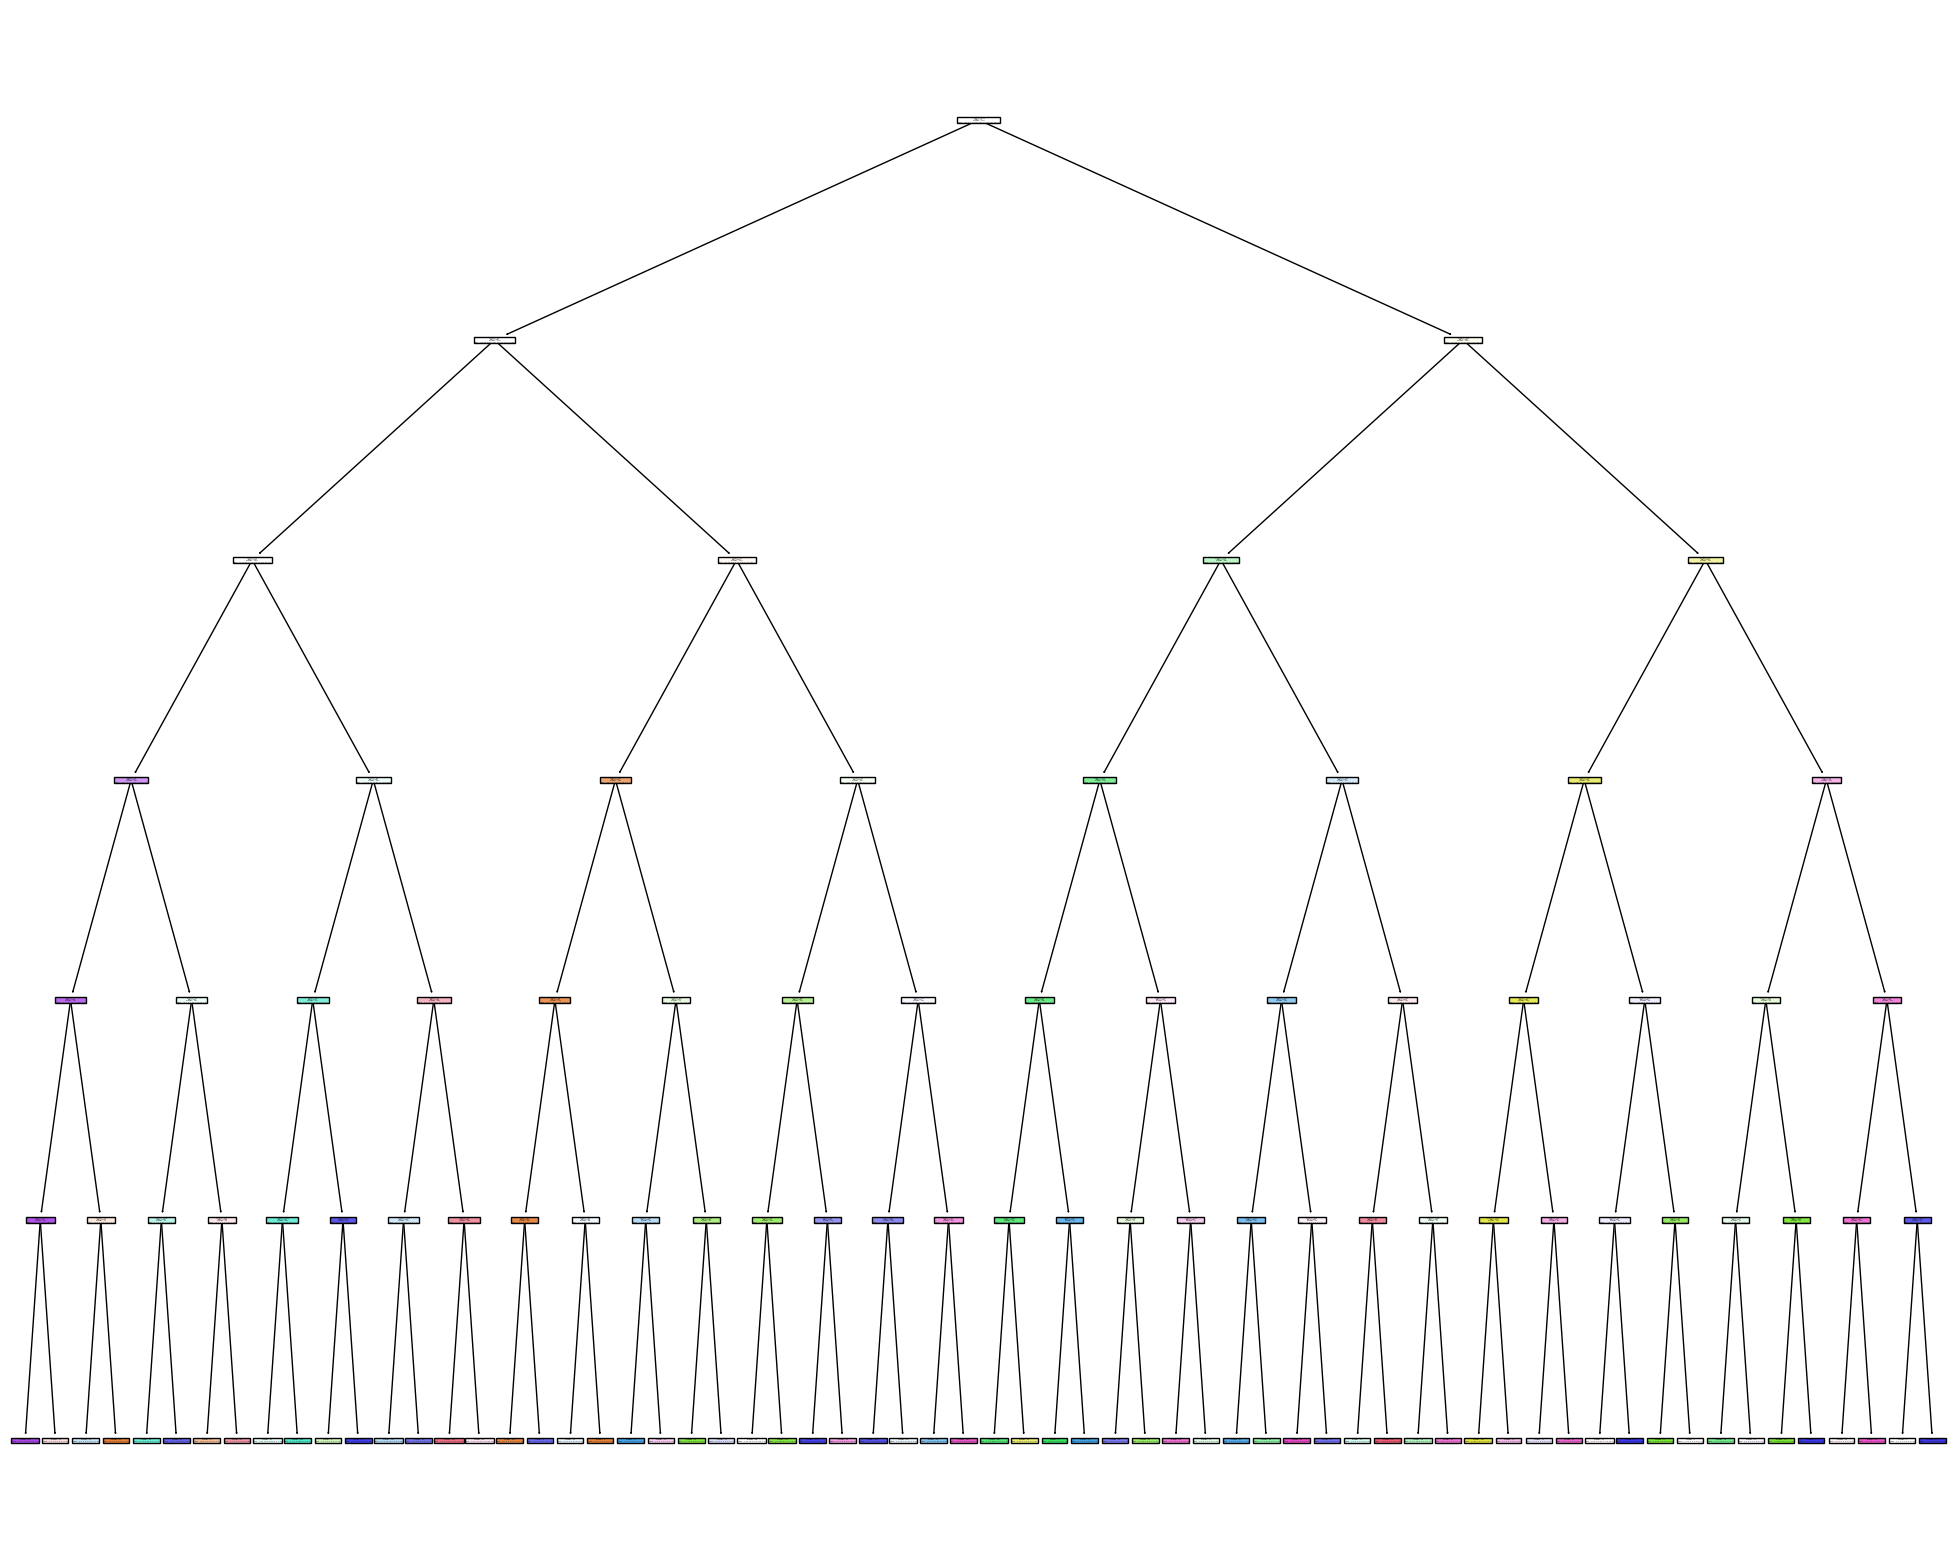

In [14]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(tree_clf,
                   #feature_names=data_drop.columns[1:],
                   #class_names=data_drop.columns[0],
                   filled=True)

In [15]:
#standard scaling
scaler=StandardScaler()
scaler.fit(X)
X_fit=scaler.transform(X)

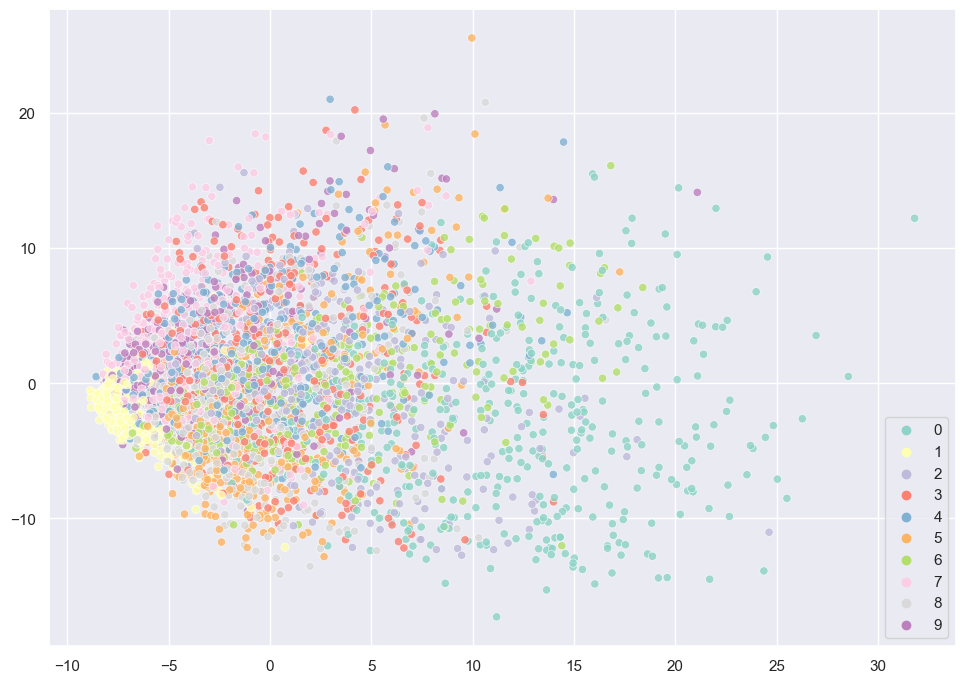

In [16]:
#PCA
pca = PCA(n_components=15)
X_pca = pca.fit_transform(X_fit)
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.scatterplot(x=X_pca[:,0],y=X_pca[:,1],hue=y,alpha=0.8,palette="Set3")
plt.legend(loc='lower right')
plt.show()

In [17]:
x_pca = pd.DataFrame(X_pca)
x_pca

0          1         2          3         4         5         6   \
0      0.294602   3.927209 -1.516427  -7.259273  2.971830  2.385058  3.592600   
1     -0.628997  -2.116054 -2.395763  -5.426057 -6.931184 -3.374737 -1.073870   
2      2.698413  -0.590016  8.579233  -3.187216 -0.435409  0.788769  0.465387   
3      0.164540   7.709642  8.418825  -7.208068 -0.870501  5.464375 -5.347192   
4      8.431847 -10.816040 -2.594139  -2.212668 -1.318096 -2.534153  4.304836   
...         ...        ...       ...        ...       ...       ...       ...   
4193  -7.582763  -0.613389  3.026740   2.491451  5.884112 -4.538478  1.237319   
4194  20.801948  -7.794817 -5.600631   2.094348  3.655403 -3.035564  0.699595   
4195   2.819156  -1.846302  6.394986  -6.210953 -1.956825 -6.646907  0.502872   
4196  15.150040  -2.143802 -0.350869  -4.641019  6.479600 -8.301092 -5.387147   
4197   2.064370  -3.738811  1.468489  10.545631 -5.711996 -4.079714  1.295224   

            7         8         9         10        11        12        13  \
0    -2.604111  0.887761 -3.108158  0.537092 -1.324427  4.416099 -3.864194   
1    -2.875321 -0.618395 -2.394350  0.764568 -0.217994  0.006166 -0.198694   
2     9.755071  2.726638 -5.195797  0.384793  0.128953  0.331871  6.931323   
3    -1.803228 -5.077489  8.019776 -0.677857 -1.445667 -0.434733 -2.283427   
4     5.333969 -1.515639 -2.186496 -1.336737 -0.613121 -1.348696  1.337980   
...        ...       ...       ...       ...       ...       ...       ...   
4193  0.297615  0.384428 -0.655891 -1.806504 -1.279328  1.237332 -1.995275   
4194  3.627765  0.542104  5.846285  0.710998 -5.506309  2.672990  3.199733   
4195  4.565840 -0.620313  2.177679 -1.940867 -0.470088  1.505764  0.820780   
4196 -5.331184  0.828659 -2.198461 -0.301991  0.191623 -2.087237 -1.710855   
4197  5.281216 -3.115477  1.720610 -4.478151 -0.311292  0.790395 -2.243418   

            14  
0    -3.292356  
1     2.133271  
2     0.089801  
3    -0.732535  
4    -3.200461  
...        ...  
4193 -0.140872  
4194 -2.402259  
4195 -0.092054  
4196 -2.583668  
4197 -2.808966  

[4198 rows x 15 columns]

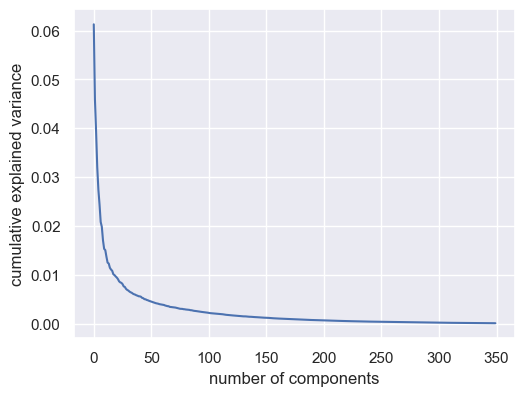

In [135]:
#variance plot over pca
sns.set(rc={'figure.figsize':(5.7,4.27)})
plt.plot(pca.explained_variance_ratio_)
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

In [18]:
# 3d pca
#used this video for reference to learn how to plot 3d pca - https://www.youtube.com/watch?v=uAZ96viaIl8&ab_channel=CSSchool

pipe_3d= Pipeline([('scaler',StandardScaler()),('pca',PCA(n_components=3))])
comp3D = pipe_3d.fit_transform(X)



In [19]:
comp3D[:,[0,1,2]]
comp3D.shape

(4198, 3)

In [20]:
pca_df=pd.DataFrame(comp3D,columns=['comp0','comp1','comp2'])

In [21]:
fig=px.scatter_3d(pca_df,x='comp0',y='comp1',z='comp2',color=y,size_max=20)
fig.update_traces(marker_size=2)
fig.show()

In [22]:
#Using tsne for dimensionality reduction
#referred this page to do tsne - https://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html
tsne = TSNE(n_components=3, random_state=42)
x_tsne = tsne.fit_transform(X)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/manifold/_t_sne.py:800: FutureWarning:

The default initialization in TSNE will change from 'random' to 'pca' in 1.2.

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/manifold/_t_sne.py:810: FutureWarning:

The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.



In [23]:
#make dataframe of tsne X and targets
tsne_df = pd.DataFrame(np.column_stack((x_tsne, y)), columns=['X_fit', 'Y', "Targets"])
#convert the targets to int
tsne_df.loc[:, "Targets"] = tsne_df.Targets.astype(int)

ValueError: Shape of passed values is (4198, 4), indices imply (4198, 3)

<Figure size 1200x1000 with 0 Axes>

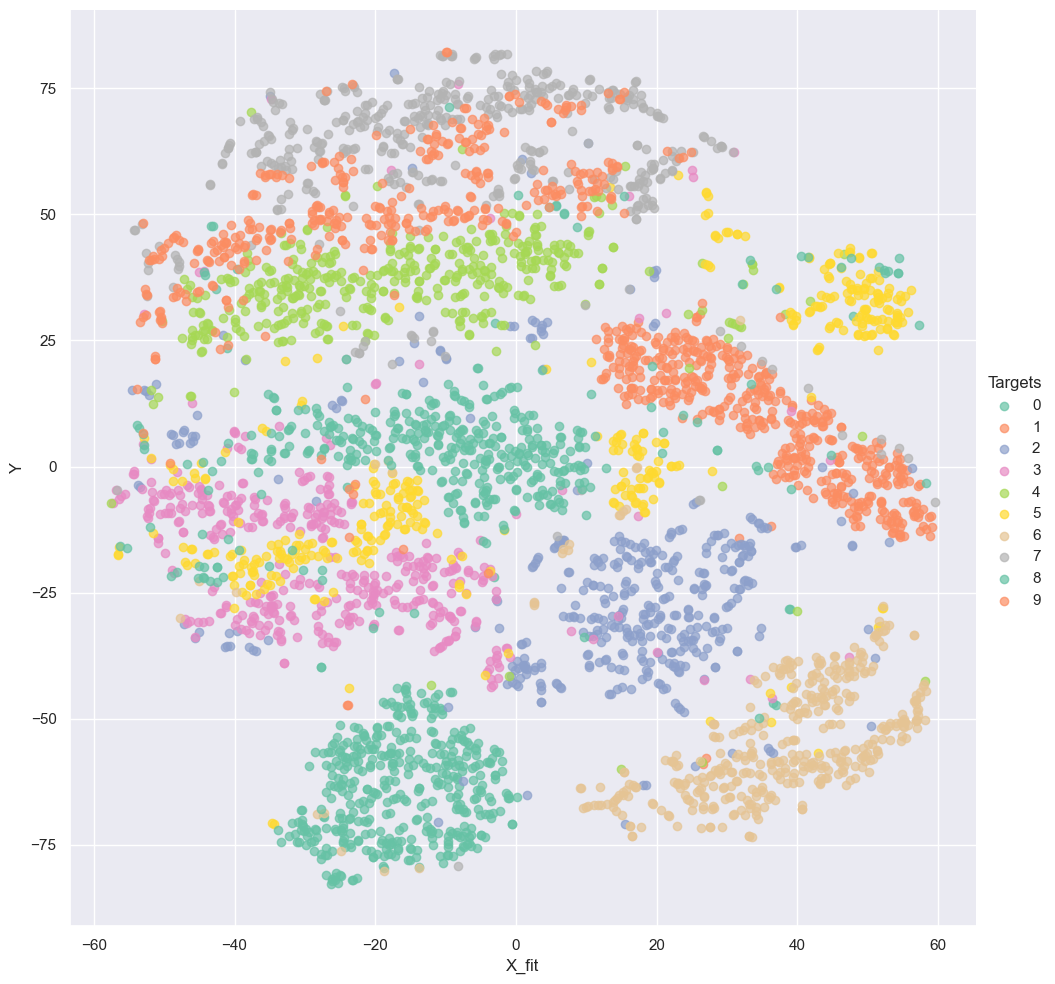

In [60]:
plt.figure(figsize=(12,10))
colorz = np.array(["red","green","blue","yellow","pink","black","orange","purple","beige","brown"])

g = sns.FacetGrid(data=tsne_df, hue='Targets', height=10,palette="Set2")

g.map(plt.scatter, 'X_fit', 'Y',alpha=0.7).add_legend()

plt.show()

In [66]:
#splitting into train and test
X_train, X_test, y_train, y_test = train_test_split(x_tsne, y, random_state=42)

In [67]:
#decision tree classifier with tsne/pca

tree = DecisionTreeClassifier(max_depth=8, random_state=42)
tree.fit(X_train, y_train)


DecisionTreeClassifier(max_depth=8, random_state=42)

In [68]:
#using this on testing data
y_pred=tree.predict(X_test)

#check accuracy of prediction:
accuracy=accuracy_score(y_test,y_pred)
print(accuracy)

0.8980952380952381


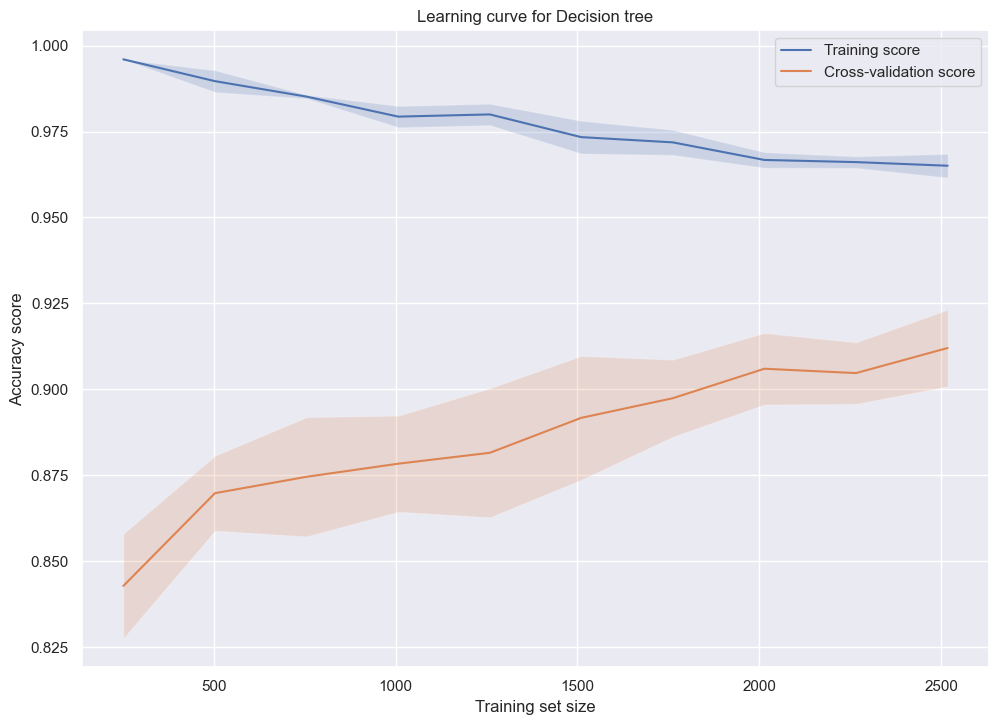

In [69]:
#plotting learning curves
from sklearn.model_selection import learning_curve
train_sizes = np.linspace(0.1, 1.0, 10)

# Generate learning curve data
train_sizes, train_scores, test_scores = learning_curve(
    tree, X_train, y_train, train_sizes=train_sizes, cv=5)

# Calculate mean and standard deviation of training and testing scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Plot learning curve
plt.plot(train_sizes, train_mean, label='Training score')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.2)
plt.plot(train_sizes, test_mean, label='Cross-validation score')
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.2)

# Add labels and legend to plot
plt.xlabel('Training set size')
plt.ylabel('Accuracy score')
plt.title('Learning curve for Decision tree')
plt.legend(loc='best')

plt.show()

/var/folders/t0/mwd450_d17x_24_r5z4fl90m0000gn/T/ipykernel_8456/2972824504.py:11: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  y_train_subset = y_train[:n_train]
/var/folders/t0/mwd450_d17x_24_r5z4fl90m0000gn/T/ipykernel_8456/2972824504.py:11: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  y_train_subset = y_train[:n_train]
/var/folders/t0/mwd450_d17x_24_r5z4fl90m0000gn/T/ipykernel_8456/2972824504.py:11: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is 

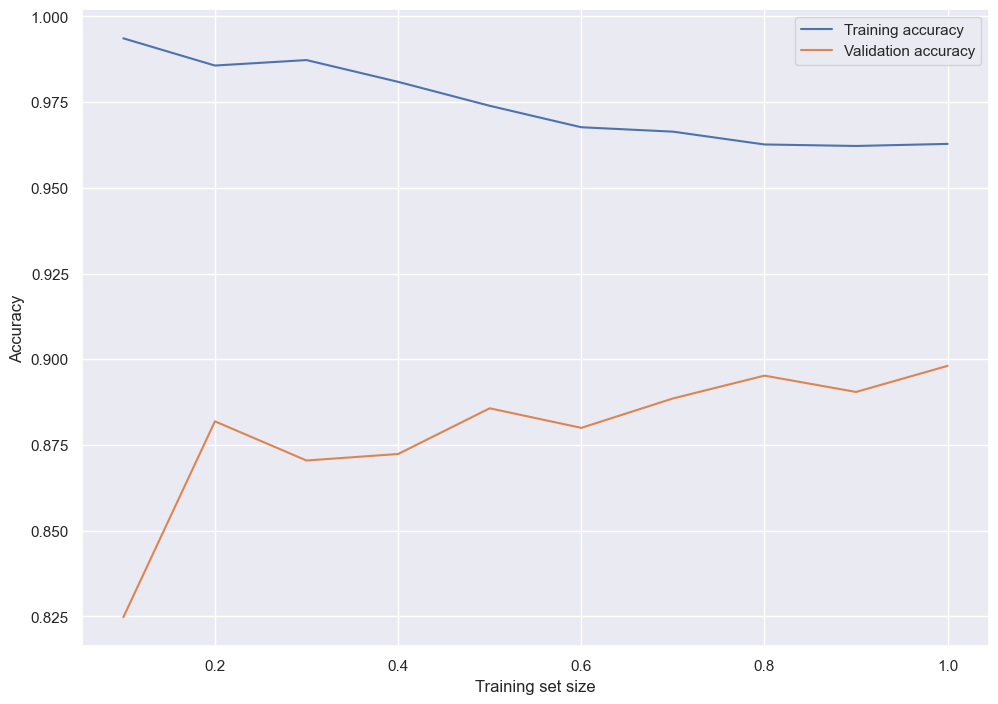

In [18]:
#plotting learning curves after splitting:
# Initialize arrays to store the training and testing accuracies for different sizes of training data
train_accs = []
test_accs = []
sizes = np.linspace(0.1, 1, num=10, endpoint=True)

# Train a decision tree classifier for different sizes of training data
for size in sizes:
    n_train = int(size * X_train.shape[0])
    X_train_subset = X_train[:n_train]
    y_train_subset = y_train[:n_train]

    tree = DecisionTreeClassifier(max_depth=8, random_state=42)
    tree.fit(X_train_subset, y_train_subset)
        # Evaluate the classifier on the training and testing data
    train_acc = tree.score(X_train_subset, y_train_subset)
    test_acc = tree.score(X_test, y_test)

    train_accs.append(train_acc)
    test_accs.append(test_acc)

# Plot the learning curves
plt.plot(sizes, train_accs, label='Training accuracy')
plt.plot(sizes, test_accs, label='Validation accuracy')
plt.xlabel('Training set size')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [ ]:
#visualizing tree with 2 branches
plt.figure(figsize=(30,20))
plot_tree(tree, filled=True, feature_names=[f'x{i}' for i in range(100)], class_names=[str(i) for i in range(10)], max_depth=2)
plt.show()

In [ ]:
#visualizing tree fully
plt.figure(figsize=(30,20))
plot_tree(tree, filled=True, feature_names=[f'x{i}' for i in range(100)], class_names=[str(i) for i in range(10)])
plt.show()

In [77]:
#predicting test data
#make it to t-sne
tsne = TSNE(n_components=3, random_state=42)
df_tsne = tsne.fit_transform(df_test)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/manifold/_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/manifold/_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


(1050, 3)

In [78]:
#make predicions
y_predictions=tree.predict(df_tsne)
accuracy=accuracy_score(df_label,y_predictions)
print(accuracy)

0.08122915674130539


In [38]:
#evaluation metrics for model with tsne:
confusion = confusion_matrix(df_label,y_predictions)
print("Confusion matrix:\n{}".format(confusion))

Confusion matrix:
[[  0   0   1  16   6  13   1   0   0 377]
 [  0   0 341  99   0   0   0  29   9   0]
 [  4   0   9 297   0  65   1   0  36   8]
 [  0   4  54  25  25   5   2  60 131 140]
 [  2 124  41  17   0  15 202   3   0   0]
 [  1   2   1  12  90 176   1  16   7  82]
 [  0   0   2   3 357   8   1  24   5   4]
 [  0 102 217 133   0   5   7   1   0   0]
 [  1   7 120  10   5   7   1 102 124  16]
 [  4 152  54  19   3  53  74  22   0   5]]


In [204]:
print("f1 score tree for >50K: {:.2f}".format(f1_score(df_label,y_predictions,average="weighted")))

f1 score tree for >50K: 0.95


In [205]:
from sklearn.metrics import classification_report
print(classification_report(df_label,y_predictions))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98       418
           1       0.94      0.99      0.96       471
           2       0.96      0.96      0.96       413
           3       0.96      0.93      0.94       425
           4       0.94      0.93      0.93       420
           5       0.93      0.94      0.94       390
           6       0.96      0.98      0.97       416
           7       0.94      0.95      0.94       436
           8       0.94      0.89      0.91       438
           9       0.92      0.91      0.92       371

    accuracy                           0.95      4198
   macro avg       0.95      0.95      0.95      4198
weighted avg       0.95      0.95      0.95      4198



In [79]:
pred_tree_prob = tree.predict_proba(df_tsne)
pred_tree_prob

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        1.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.01190476,
        0.98809524],
       [0.        , 0.        , 1.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 1.        , ..., 0.        , 0.        ,
        0.        ]])

In [214]:
#AOC-ROC 


In [80]:
#start cross valdiation
tree_scores = cross_val_score(tree, X_train, y_train, scoring="accuracy",cv=4)
print("Cross-validation scores: {}".format(tree_scores))
print("Average cross-validation score: {:.2f}".format(tree_scores.mean()))

Cross-validation scores: [0.91232529 0.89961881 0.9021601  0.91486658]
Average cross-validation score: 0.91


In [218]:
from sklearn.model_selection import cross_validate

tree_res = cross_validate(tree, X_train, y_train, cv=4,
                     return_train_score=True)
tree_res_df = pd.DataFrame(tree_res)
display(tree_res_df)
print("Mean times and scores:\n", tree_res_df.mean())

fit_time  score_time  test_score  train_score
0  0.010072    0.000797    0.912325     0.965269
1  0.007383    0.000585    0.899619     0.970352
2  0.006625    0.000285    0.902160     0.969081
3  0.006723    0.000472    0.914867     0.962304

Mean times and scores:
 fit_time       0.007701
score_time     0.000535
test_score     0.907243
train_score    0.966751
dtype: float64
